This shall contain the codes related to time based analysis for the city(borough wise too).

We first segregate the accidents day-time wise and then we plot the pie chart based on the number of accidents. We then also try to segregate them based on the fatality of the accidents and form an inference from it.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import time

In [5]:
df = pd.read_csv("Dataset1.csv")
df.drop(columns=['CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'], inplace=True)
df.dropna(subset=['BOROUGH'], inplace=True)
df.dropna(subset=['LATITUDE', 'LONGITUDE'], inplace=True)
df = df[df['LATITUDE']!=0]
df = df[df['LONGITUDE']!=0]

/tmp/ipykernel_15462/2450223333.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Dataset1.csv")


In [6]:
time1 = time(6,00,00)
time2 = time(12,00,00)
time3 = time(16,30,00)
time4 = time(22,00,00)

def custom_time_func(row,time1,time2,time3,time4):
    if row['CRASH TIME']>=str(time4) or row['CRASH TIME']<str(time1):
        return "MID NIGHT"
    elif row['CRASH TIME']>=str(time1) and row['CRASH TIME']<str(time2):
        return "MORNING"
    elif row['CRASH TIME']>=str(time2) and row['CRASH TIME']<str(time3):
        return "AFTERNOON"
    elif row['CRASH TIME']>= str(time3) and row['CRASH TIME']<str(time4):
        return "NIGHT"

In [9]:
def plot_pie_chart(df):
    plt.pie(df,labels = df.index,
                    autopct = '%1.1f%%',shadow = True,
                    startangle = 0,
                    wedgeprops = {"edgecolor":"black",
                            'linewidth': 2,
                            'antialiased': True})
    plt.axis('equal')  
    plt.show()

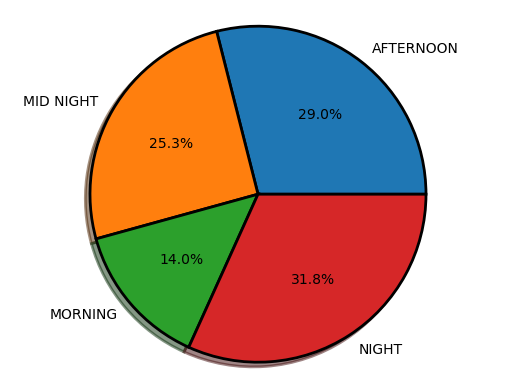

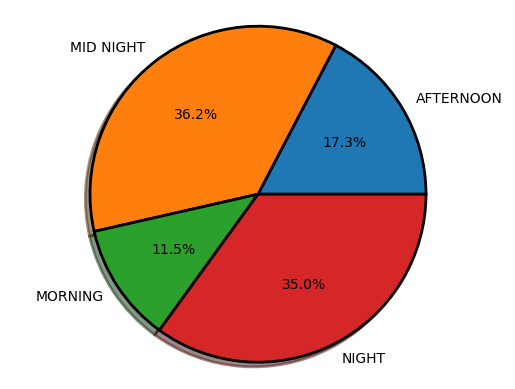

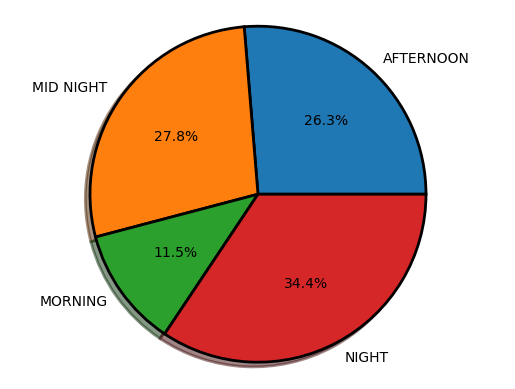

In [15]:
df1 = df
df1['CRASH_DAYTIME'] = df1.apply(custom_time_func,args=(time1,time2,time3,time4),axis=1)
df2 = df1.groupby('CRASH_DAYTIME')
df3 = df2.size()
plot_pie_chart(df3)

df5 = df1.groupby(by='CRASH_DAYTIME')['NUMBER OF PERSONS KILLED'].sum()
df5 = pd.Series(df5)
plot_pie_chart(df5)

df5 = df1.groupby(by='CRASH_DAYTIME')['NUMBER OF PERSONS INJURED'].sum()
df5 = pd.Series(df5)
plot_pie_chart(df5)




/tmp/ipykernel_15462/1155393546.py:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for name, group in groups:


BRONX


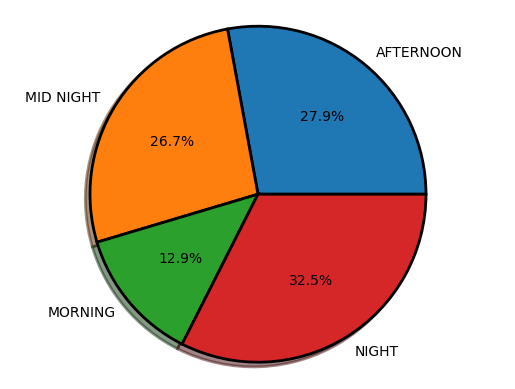

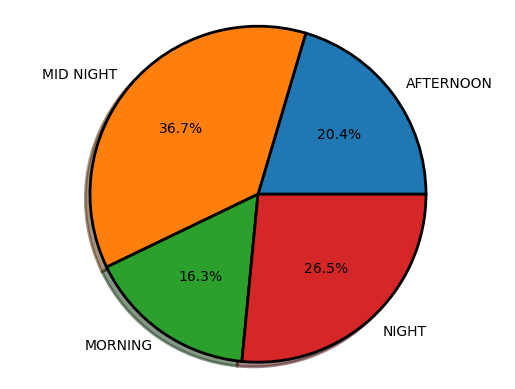

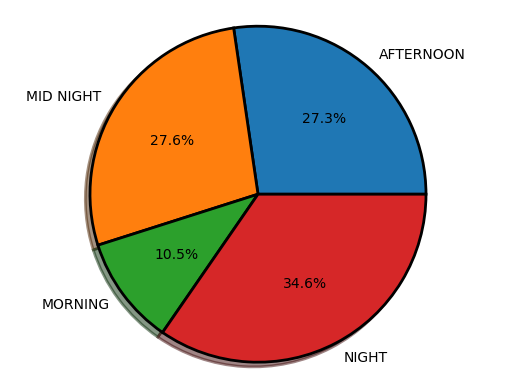

BROOKLYN


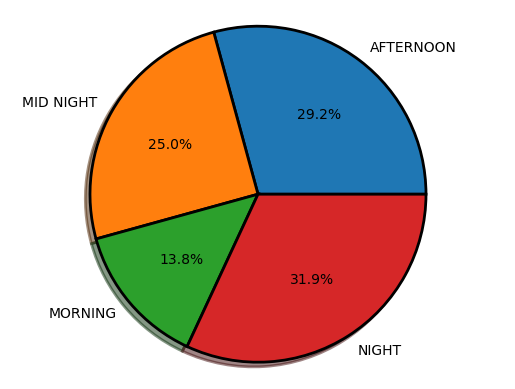

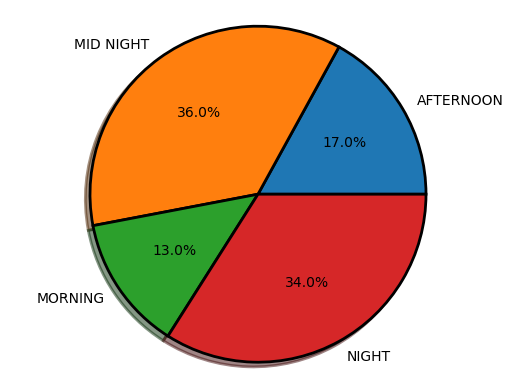

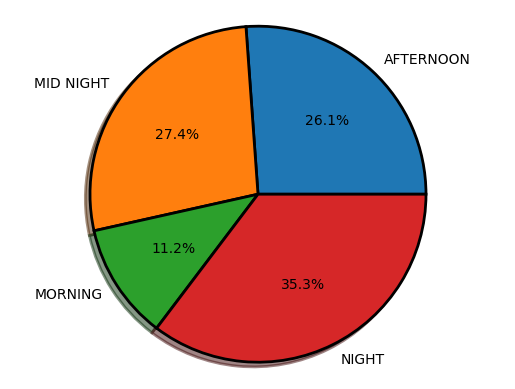

MANHATTAN


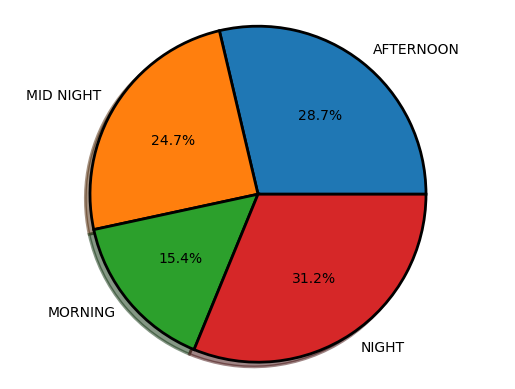

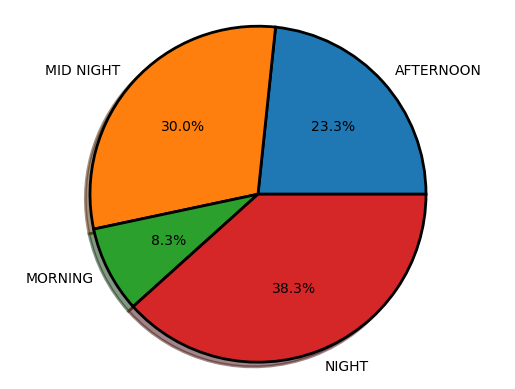

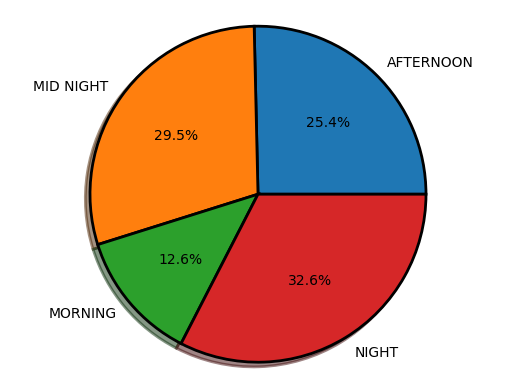

QUEENS


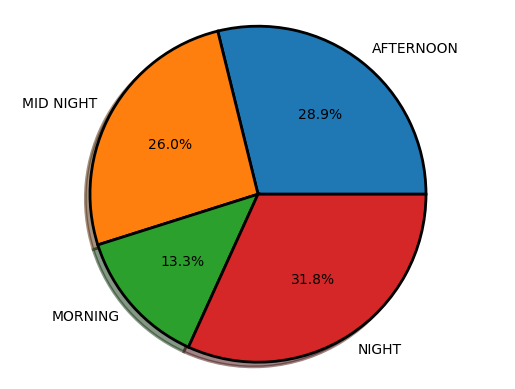

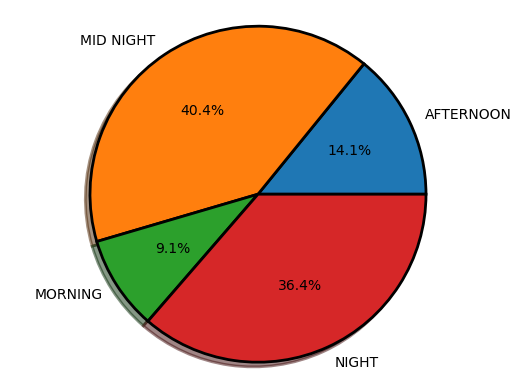

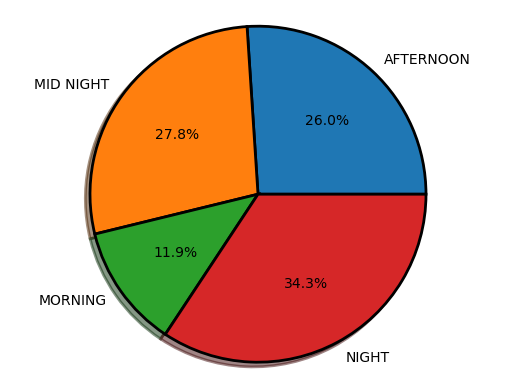

STATEN ISLAND


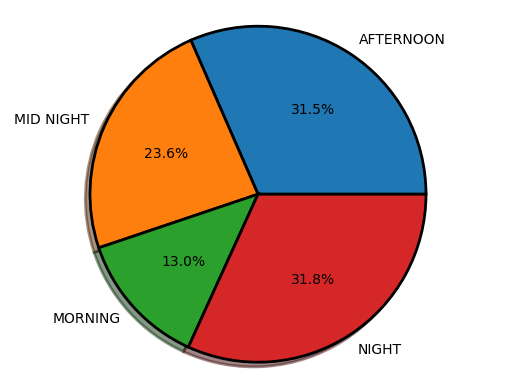

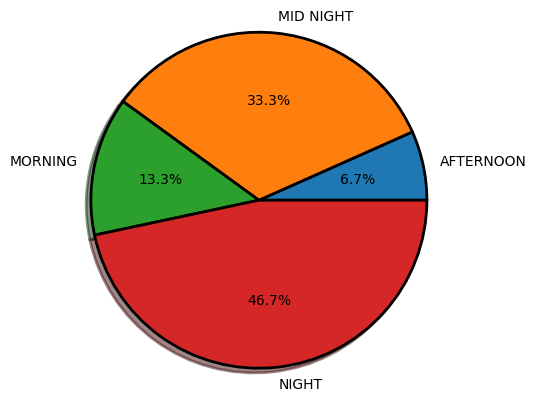

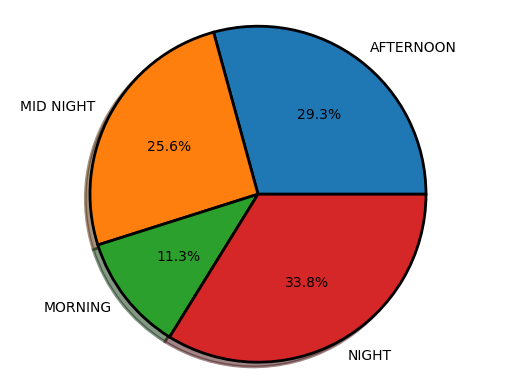

In [14]:
groups = df.groupby(by=['BOROUGH'])

for name, group in groups:
        print(name)
        group['CRASH_DAYTIME'] = group.apply(custom_time_func,args=(time1,time2,time3,time4),axis=1)
        df3 = group.groupby('CRASH_DAYTIME')
        df4 = df3.size()
        plot_pie_chart(df4)

        df5 = group.groupby(by='CRASH_DAYTIME')['NUMBER OF PERSONS KILLED'].sum()
        df5 = pd.Series(df5)
        plot_pie_chart(df5)

        df5 = group.groupby(by='CRASH_DAYTIME')['NUMBER OF PERSONS INJURED'].sum()
        df5 = pd.Series(df5)
        plot_pie_chart(df5)